In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()

In [ ]:
print("Sample Review:")
print(X_train[0])
print("Label:", y_train[0])

Sample Review:
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Label: 1


In [ ]:
print("Label:", y_train[0])

Label: 1


In [ ]:
print("Number of training samples:", len(X_train))
print("Number of test samples:", len(X_test))

Number of training samples: 25000
Number of test samples: 25000


In [ ]:
avg_length_train = np.mean([len(review) for review in X_train])
avg_length_test = np.mean([len(review) for review in X_test])
print("Average length of training reviews:", avg_length_train)
print("Average length of test reviews:", avg_length_test)

Average length of training reviews: 238.71364
Average length of test reviews: 230.8042


In [ ]:
unique_labels, label_counts = np.unique(y_train, return_counts=True)
print("Distribution of labels in training set:")
print("Label 0 (Negative):", label_counts[0])
print("Label 1 (Positive):", label_counts[1])

Distribution of labels in training set:
Label 0 (Negative): 12500
Label 1 (Positive): 12500


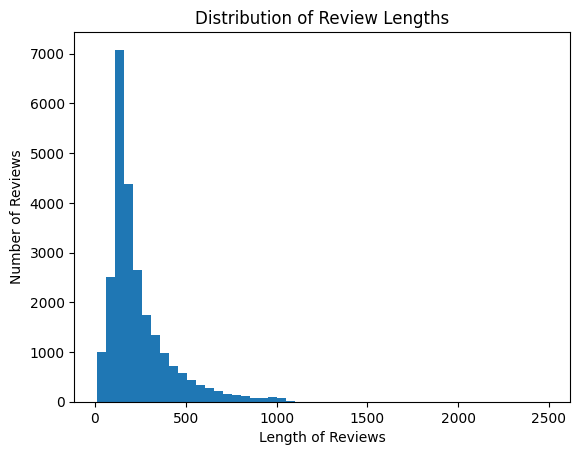

In [ ]:
plt.hist([len(review) for review in X_train], bins=50)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Reviews')
plt.ylabel('Number of Reviews')
plt.show()

In [ ]:
max_sequence_length = 200  # Maximum length of a review
X_train = pad_sequences(X_train, maxlen=max_sequence_length)
X_test = pad_sequences(X_test, maxlen=max_sequence_length)

In [ ]:
embedding_size = 128
model = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_size, input_length=max_sequence_length),
    LSTM(units=64, dropout=0.2, recurrent_dropout=0.2),
    Dense(units=1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=30, validation_split=0.2)


Epoch 1/30
157/157 [==============================] - 120s 723ms/step - loss: 0.4487 - accuracy: 0.7842 - val_loss: 0.3144 - val_accuracy: 0.8706
Epoch 2/30
157/157 [==============================] - 105s 670ms/step - loss: 0.2424 - accuracy: 0.9076 - val_loss: 0.3220 - val_accuracy: 0.8646
Epoch 3/30
157/157 [==============================] - 101s 645ms/step - loss: 0.1763 - accuracy: 0.9370 - val_loss: 0.3382 - val_accuracy: 0.8642
Epoch 4/30
157/157 [==============================] - 100s 634ms/step - loss: 0.1281 - accuracy: 0.9537 - val_loss: 0.3643 - val_accuracy: 0.8708
Epoch 5/30
157/157 [==============================] - 99s 627ms/step - loss: 0.1132 - accuracy: 0.9597 - val_loss: 0.4842 - val_accuracy: 0.8646
Epoch 6/30
157/157 [==============================] - 101s 642ms/step - loss: 0.0835 - accuracy: 0.9714 - val_loss: 0.4103 - val_accuracy: 0.8622
Epoch 7/30
157/157 [==============================] - 103s 657ms/step - loss: 0.0754 - accuracy: 0.9753 - val_loss: 0.5767 - 

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

782/782 [==============================] - 50s 64ms/step - loss: 0.8609 - accuracy: 0.8442
Test Loss: 0.8609, Test Accuracy: 0.8442


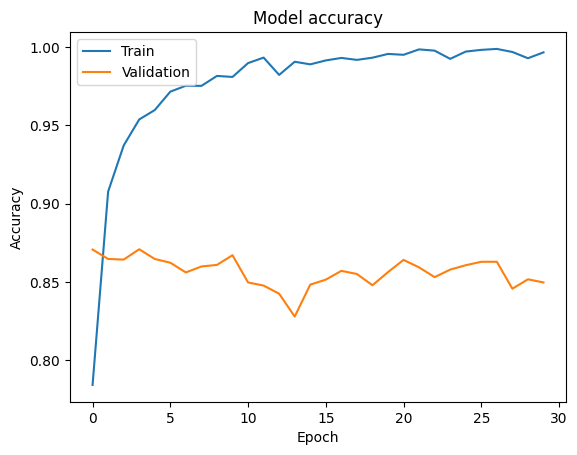

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

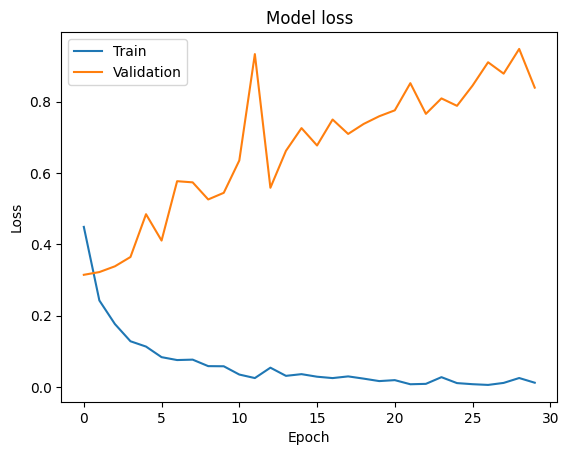

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
def predict_reviews(model, reviews):
    word_index = imdb.get_word_index()
    reviews_sequences = [[word_index.get(word, 0) for word in review.split()] for review in reviews]
    reviews_padded = pad_sequences(reviews_sequences, maxlen=200)

    predictions = model.predict(reviews_padded)
    predictions = (predictions > 0.5).astype(int)

    return predictions
